In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (6, 5)
%matplotlib inline
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV

In [ ]:
url = 'https://raw.githubusercontent.com/satishgunjal/datasets/master/Fish.csv'
df = pd.read_csv(url)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


#### Data Inspection

In [ ]:
print(f"My data has {df.shape[0]} number of rows and {df.shape[1]} columns")

My data has 159 number of rows and 7 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df_numeric = df.select_dtypes([np.number])
df_numeric.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
numeric_cols = df_numeric.columns.to_list()
numeric_cols

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

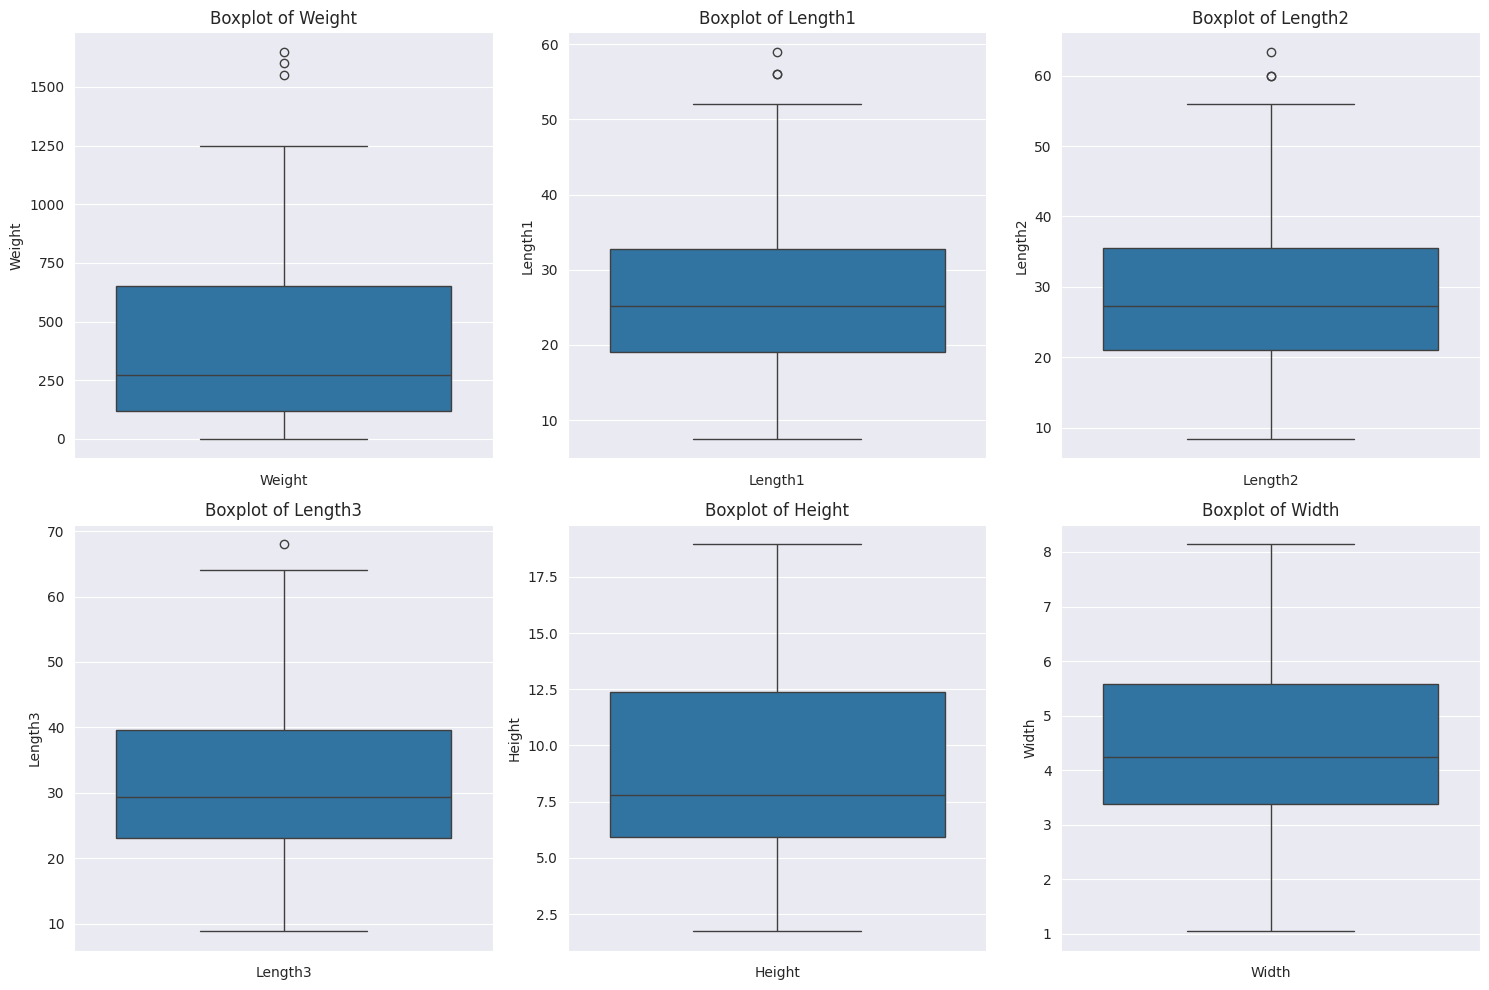

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()
for i in range(len(numeric_cols)):
    sns.boxplot(df_numeric[numeric_cols[i]], ax=ax[i])
    ax[i].set_title(f"Boxplot of {numeric_cols[i]}")
    ax[i].set_xlabel(numeric_cols[i])
plt.tight_layout()

In [ ]:
df_numeric.columns[:-2]

Index(['Weight', 'Length1', 'Length2', 'Length3'], dtype='object')

In [ ]:
# Columns with Outliers

col_towork_on = df_numeric.columns[:-2].to_list()
col_towork_on

['Weight', 'Length1', 'Length2', 'Length3']

In [ ]:
## Extracting the rows with the Outliers using Function and For loop
def outlier_detection(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers

for col in col_towork_on:
  print(f"Outliers in {col} are :")
  print(outlier_detection(df_numeric, col)[col])
  print("\n")

Outliers in Weight are :
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


Outliers in Length1 are :
142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64


Outliers in Length2 are :
142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64


Outliers in Length3 are :
144    68.0
Name: Length3, dtype: float64




In [ ]:
## Lets keep the columns without Outliers

def outlier_removal(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
  return df

In [ ]:
for col in col_towork_on:
  df = outlier_removal(df, col)

In [ ]:
df.shape

(155, 7)

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Axes: xlabel='Species'>

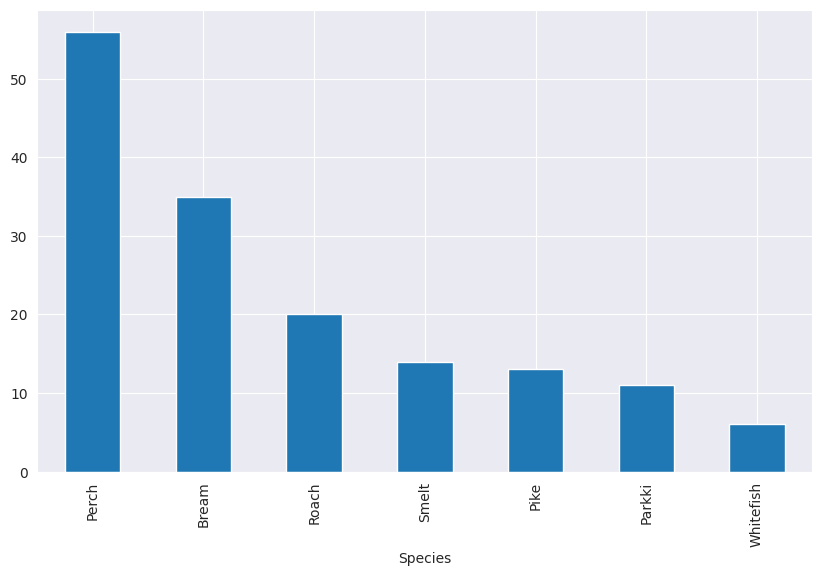

In [ ]:
df['Species'].value_counts(ascending=False).plot(kind='bar')

In [ ]:
df.groupby("Species")['Weight'].mean().sort_values(ascending=False)

,Weight
Species,
Bream,617.828571
Whitefish,531.000000
Pike,474.461538
Perch,382.239286
Parkki,154.818182
Roach,152.050000
Smelt,11.178571


In [ ]:
df[df.Species == 'Smelt']

,Species,Weight,Length1,Length2,Length3,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936


In [ ]:
df[df.Species == 'Perch']

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [ ]:
df[df['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [ ]:
df = df[~(df['Weight'] == 0)]
df.shape

(154, 7)

In [ ]:
df_smelt = df[df['Species'] == 'Smelt']
df_smelt.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772


<Axes: xlabel='Length1', ylabel='Weight'>

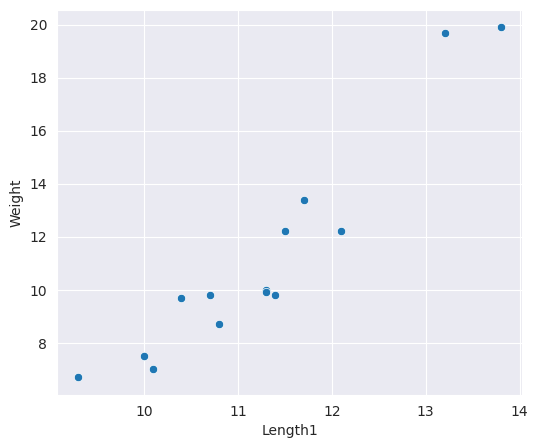

In [ ]:
sns.scatterplot(x= df_smelt['Length1'], y=df_smelt['Weight'])

<Axes: xlabel='Length1', ylabel='Weight'>

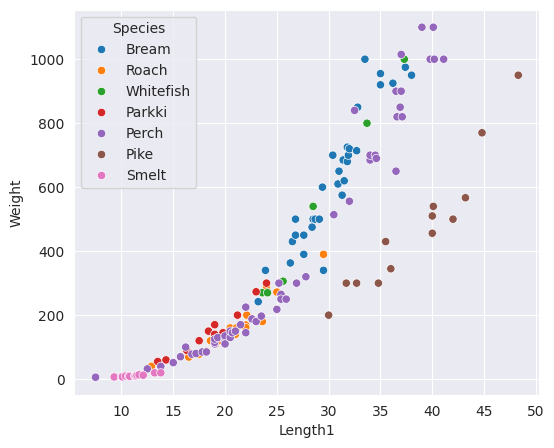

In [ ]:
sns.scatterplot(data=df, x='Length1', y='Weight', hue='Species')

<Axes: xlabel='Length2', ylabel='Weight'>

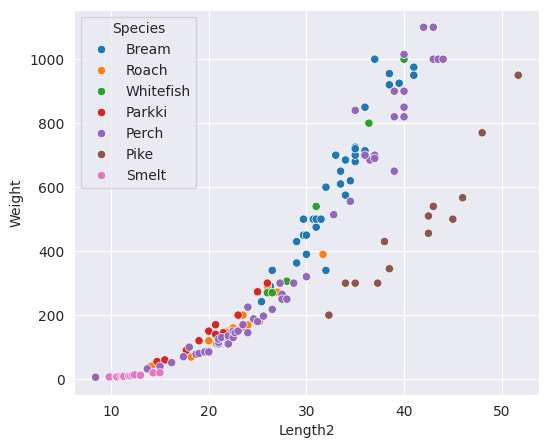

In [ ]:
sns.scatterplot(data=df, x='Length2', y='Weight', hue='Species')

<Axes: xlabel='Length3', ylabel='Weight'>

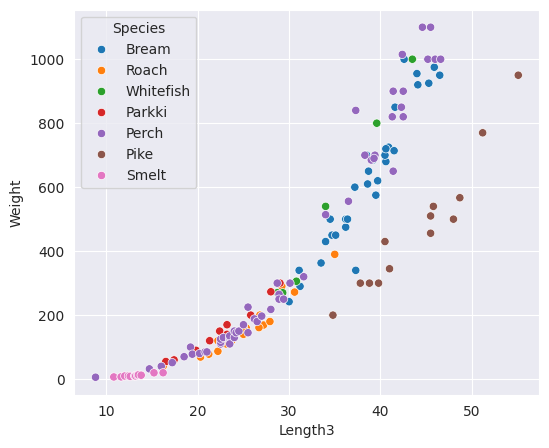

In [ ]:
sns.scatterplot(data=df, x='Length3', y='Weight', hue='Species')

<Axes: xlabel='Height', ylabel='Weight'>

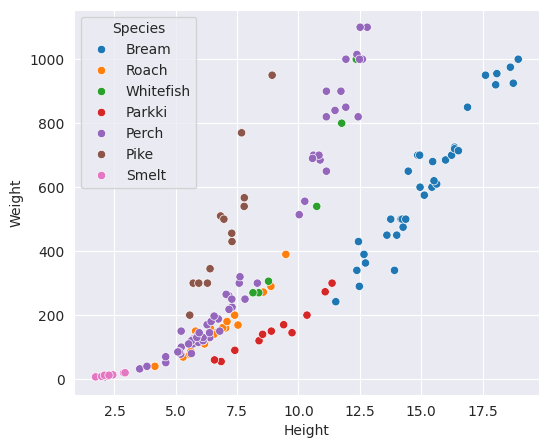

In [ ]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Species')

<Axes: xlabel='Width', ylabel='Weight'>

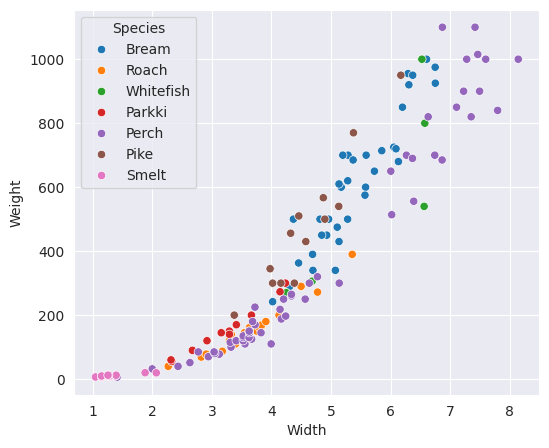

In [ ]:
sns.scatterplot(data=df, x='Width', y='Weight', hue='Species')

In [ ]:
df.select_dtypes([np.number]).corr()['Weight'].sort_values(ascending=False)

,Weight
Weight,1.000000
Width,0.926332
Length3,0.902653
Length2,0.894373
Length1,0.890155
Height,0.815435


In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df_species = pd.get_dummies(df['Species']).astype(int)
df_species.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, df_species], axis=1)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [ ]:
df.drop(['Species'], axis="columns", inplace=True)

In [ ]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     154 non-null    float64
 1   Length1    154 non-null    float64
 2   Length2    154 non-null    float64
 3   Length3    154 non-null    float64
 4   Height     154 non-null    float64
 5   Width      154 non-null    float64
 6   Bream      154 non-null    int64  
 7   Parkki     154 non-null    int64  
 8   Perch      154 non-null    int64  
 9   Pike       154 non-null    int64  
 10  Roach      154 non-null    int64  
 11  Smelt      154 non-null    int64  
 12  Whitefish  154 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 16.8 KB


# Modelling

In [ ]:
X = df.drop(['Weight'], axis=1)
y = df['Weight']

In [ ]:
X.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [ ]:
y.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
# Using Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print(f"Train Score : {r2_score(y_train, y_train_pred)}")
print(f"Test Score : {r2_score(y_test, y_test_pred)}")

print("-"*40)

print(f"Train MAE : {mean_absolute_error(y_train, y_train_pred)}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred)}")

Train Score : 0.9415052713673978
Test Score : 0.9550133015213161
----------------------------------------
Train MAE : 57.99344307984038
Test MAE : 50.67783682293553


In [ ]:
# pipe = Pipeline([('scale', StandardScaler()), ("poly", PolynomialFeatures(degree=2, include_bias=True)),
#                  ("lr", LinearRegression())])

In [ ]:
### Fitting Polynomial Regression: Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=True)),
                 ("lr", LinearRegression())])
pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [ ]:
pipe["lr"].coef_

array([-2.53873708e-06,  9.49692920e+03, -2.09636368e+04,  1.10344831e+04,
       -1.65721738e+03,  1.57109877e+03, -1.81940274e+02,  6.32841913e+01,
        1.57559875e+02, -3.35555713e+02,  3.88036000e+01,  1.10425458e+02,
        1.47422864e+02, -7.69681953e+04,  1.26271752e+05, -1.52869368e+04,
       -5.25185980e+04,  6.40591795e+04,  1.55997205e+04, -7.60540578e+02,
       -6.21795891e+03,  3.88739166e+03, -4.39315509e+02, -3.91488655e+03,
        1.34251859e+03, -3.04295485e+05,  5.46888097e+05,  1.50677387e+04,
       -4.97874169e+04, -3.01853696e+04, -1.24118040e+03,  1.69424100e+04,
       -9.60569632e+03, -5.83945602e+03,  1.01176437e+04, -1.15198810e+03,
       -2.81132151e+05,  5.89271495e+04, -1.95294404e+04,  8.99130959e+03,
       -7.94226920e+02, -1.10968023e+04,  1.01067212e+04,  6.33469036e+03,
       -4.17782691e+03,  1.67061810e+03, -1.09521257e+04, -1.23955140e+03,
        3.53145544e+03,  3.20491561e+03,  1.35712836e+03, -7.64302447e+03,
        6.45308494e+02, -

In [ ]:
len(pipe["lr"].coef_)

91

In [ ]:
y_pred_train = pipe.predict(X_train_scaled)
y_pred_test = pipe.predict(X_test_scaled)


print(f"Train Score : {r2_score(y_train, y_train_pred)}")
print(f"Test Score : {r2_score(y_test, y_test_pred)}")

print("-"*40)

print(f"Train MAE : {mean_absolute_error(y_train, y_train_pred)}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred)}")

Train Score : 0.9415052713673978
Test Score : 0.9550133015213161
----------------------------------------
Train MAE : 57.99344307984038
Test MAE : 50.67783682293553
